# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках.

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


Generated 50 train samples and 50 test samples
-6.237548916320936 9.466542725717133
MSE: 132.05048421618085 MAE: 9.04965770413703


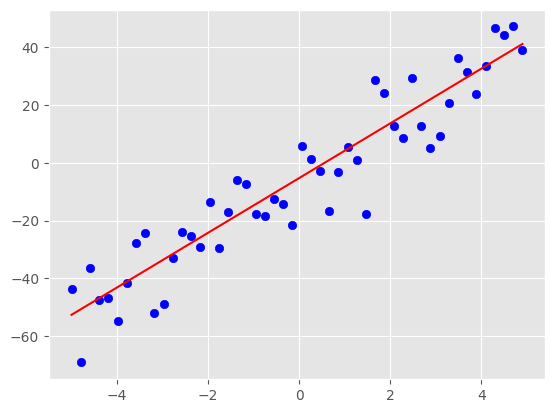

In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn
X, X_train, y_train, X_test, y_test = generate_data(100)

first_column = np.ones((len(X_train), 1))
X_train = np.hstack((first_column, X_train))

w = np.linalg.lstsq(X_train, y_train, rcond=None)[0]

first_column = np.ones((len(X_test), 1))
X_test = np.hstack((first_column, X_test))

bias = w[0]
y_predict = X_test @ w
print(bias,w[1])
mse = np.mean((y_test - y_predict)**2)
mae = np.mean(np.abs(y_test - y_predict))


print("MSE:",mse,"MAE:",mae)
plt.plot(X[0::2].reshape(-1, 1), y_predict, color='red', label='Predict')
plt.scatter(X[0::2].reshape(-1, 1),y_train, color='blue', label='Train')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model = LinearRegression()

model.fit(X_train, y_train)

skl_y_predict = model.predict(X_test)

skl_mse=mean_squared_error(y_test, skl_y_predict)
skl_mae=mean_absolute_error(y_test, skl_y_predict)
w = model.coef_
b = model.intercept_
print(w,b)
print("skl_mse:",skl_mse,"skl_mae:",skl_mae)


[0.         9.46654273] -6.237548916320936
skl_mse: 132.05048421618085 skl_mae: 9.049657704137026


**Пояснение.**
Введем фиктивный признак x0, он всегда равняется 1, а его вес w0 - bias.
У нас получилась матрица, у которой первый столбец это единицы, а второй значение признака X.

Далее мы обучаем нашу модель подбирая параметры(веса) таким образом, чтобы минимизировать ошибку предсказания на обучающих данных.

Далее мы проверяем нашу обученную модель на тестовой выборке, справится ли она с прогнозированием новых данных.

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

MSE: 0.24989331038072413 MAE: 0.40984900580089534


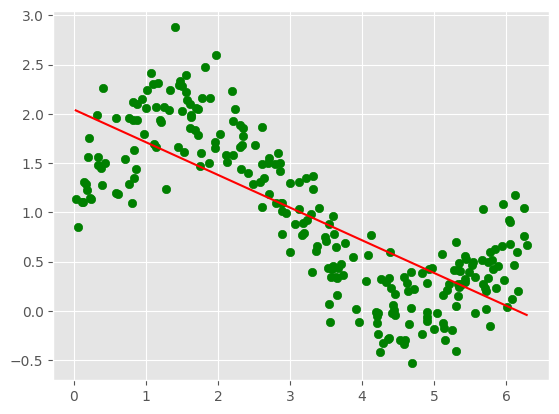

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE
x2_train = data['x_train'].reshape(-1, 1)
y2_train=data['y_train']

first_column = np.ones((len(x2_train), 1))
x2_train = np.hstack((first_column, x2_train))

w = np.linalg.lstsq(x2_train, y2_train, rcond=None)[0]

# bias = w[0]
y2_predict = x2_train @ w

mse = np.mean((y2_train - y2_predict)**2)
mae = np.mean(np.abs(y2_train - y2_predict))


print("MSE:",mse,"MAE:",mae)
plt.plot(data['x_train'], y2_predict, color='red', label='Predict')
plt.scatter(data['x_train'],data['y_train'], color='green', label='Actual')

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \widehat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$

## Задание 3.3

MSE: 0.24989331038072413 MAE: 0.4098490058008954 Итерация: 1
MSE: 0.24888714744143922 MAE: 0.4071695530733565 Итерация: 2
MSE: 0.09402406445922108 MAE: 0.2508201939953454 Итерация: 3
MSE: 0.09208976150398424 MAE: 0.24570116691300317 Итерация: 4
MSE: 0.08654557126045159 MAE: 0.23896626536552773 Итерация: 5
MSE: 0.0865454826663544 MAE: 0.23897794758806917 Итерация: 6
MSE: 0.08631517325787769 MAE: 0.23884138686862338 Итерация: 7
MSE: 0.08622604819032625 MAE: 0.23796225775347882 Итерация: 8
MSE: 0.08543500785764178 MAE: 0.23749450566787206 Итерация: 9
MSE: 0.08482528151093757 MAE: 0.23710416242046922 Итерация: 10
MSE: 0.08464991448709547 MAE: 0.2369462289560318 Итерация: 11
MSE: 0.08462303622261132 MAE: 0.2367349757833859 Итерация: 12
MSE: 0.08444685621877743 MAE: 0.2362717044231941 Итерация: 13
MSE: 0.08415115701069402 MAE: 0.23598887351990097 Итерация: 14
MSE: 0.0844616469497667 MAE: 0.23631358118118648 Итерация: 15
MSE: 0.08428797745245763 MAE: 0.23618012800426402 Итерация: 16
MSE: 0.08

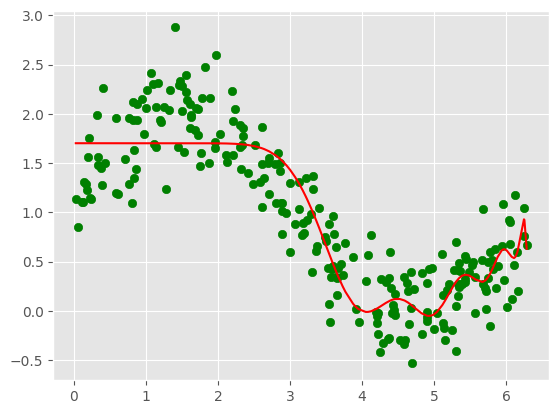

In [ ]:
### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
### Полином какой степени подходит больше других? Почему?

from sklearn.preprocessing import PolynomialFeatures

x2_train = data['x_train'].reshape(-1, 1)
y2_train=data['y_train']

for k in range(1, 30):
  polynomialFeatures = PolynomialFeatures(k)
  x2_train_polynomial = polynomialFeatures.fit_transform(x2_train)

  model = LinearRegression()
  model.fit(x2_train_polynomial, y2_train)

  y2_predict = model.predict(x2_train_polynomial)

  mse = np.mean((y2_train - y2_predict)**2)
  mae = np.mean(np.abs(y2_train - y2_predict))
  print("MSE:", mse, "MAE:", mae, "Итерация:", k)

plt.plot(x2_train, y2_predict, color='red', label='Predict')
plt.scatter(x2_train, y2_train, color='green', label='Train')

**Пояснение.**Мы воспользовались полиномиальной регрессией, добавили столбцы x^k в нашу матрицу x2_train. Мы возводим признаки в степень, при увеличении k наша модель становится более гибкой, но так же стоит не забывать про возможность переобучение нашей модели. В какой-то момент при увеличении k, мы заметим что наша ошибка снова начнет расти, это говорит о переобучении модели.
Нам нужно выбрать такой коэфициент k, при котором наша ошибка будет минимальна,главное не взять слишком большой коэфициент, так как возможно переобучение модели.
Начиная с итерации 17 наша ошибка растет.Следовательно больше не стоит повышать количество итераций.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

Возьмите датасет отсюда: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/

## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

part = SelectKBest(f_regression, k=7)
X_part = part.fit_transform(data, target)

model = LinearRegression()
model_part = LinearRegression()

model.fit(data, target)
model_part.fit(X_part, target)

predict_full = model.predict(data)
predict_part = model_part.predict(X_part)

mse_full = mean_squared_error(target, predict_full)
mae_full = mean_absolute_error(target, predict_full)

mse_part = mean_squared_error(target, predict_part)
mae_part = mean_absolute_error(target, predict_part)

print("mse_full",mse_full,"mae_full",mae_full)
print("mse_part",mse_part,"mae_part",mae_part)

mse_full 21.894831181729202 mae_full 3.270862810900316
mse_part 26.787321015346713 mae_part 3.588405232890935
